In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

In [ ]:
def get_models():
	models = dict()
	for i in range(1,21):
		base = DecisionTreeClassifier(max_depth=i)
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

>1 0.806 (0.041)
>2 0.864 (0.028)
>3 0.869 (0.026)
>4 0.892 (0.029)
>5 0.915 (0.028)
>6 0.917 (0.022)
>7 0.924 (0.029)
>8 0.928 (0.025)
>9 0.931 (0.025)
>10 0.933 (0.028)
>11 0.878 (0.075)
>12 0.824 (0.059)
>13 0.803 (0.033)
>14 0.801 (0.036)
>15 0.799 (0.039)
>16 0.803 (0.033)
>17 0.801 (0.038)
>18 0.796 (0.040)
>19 0.802 (0.038)
>20 0.804 (0.033)


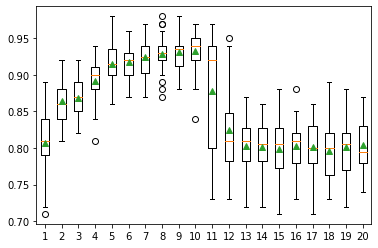

In [ ]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()